<div class="alert alert-success">
At first, since there are no names for the columns of our data, we will start by creating them :
</div>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB

In [2]:
names = ['age',
          'class of worker',
          'detailed industry recode',
          'detailed occupation recode',
          'education',
          'wage per hour',
          'enroll in edu inst last wk',
          'marital stat',
          'major industry code',
          'major occupation code',
          'race',
          'hispanic origin',
          'sex',
          'member of a labor union',
          'reason for unemployment',
          'full or part time employment stat',
          'capital gains',
          'capital losses',
          'dividends from stock',
          'tax filer stat',
          'region of previous residence',
          'state of prevous residence',
          'detailed household and family stat',
          'detailed household summary in household',
          'instance weight',
          'migration code-change in msa',
          'migration code-change in reg',
          'migration code-move within region',
          'live in this house 1 year ago',
          'migration prev res in sunbelt',
          'num persons worked for employer',
          'family members under 18',
          'country of birth father',
          'country of birth mother',
          'country of birth self',
          'citizenship',
          'own business or self employed',
          "fill inc questionnaire for veteran's admin",
          'veterans benefits',
          'weeks worked in year',
          'year',
          'income']

dftrain=pd.read_csv('census_income_learn.csv',names=names)
dftest=pd.read_csv('census_income_test.csv',names=names)
grouped_dftrain=dftrain.groupby("income")

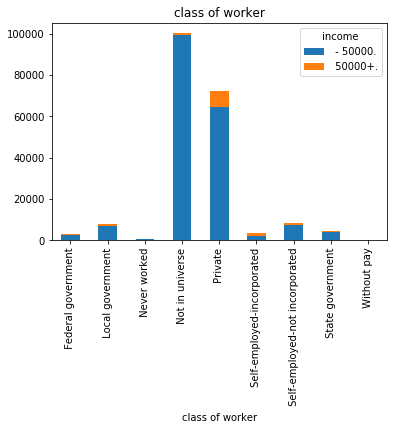

In [3]:
%matplotlib inline
dftrain.groupby('income')['class of worker'].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title='class of worker')

<div class="alert alert-success">
<p>A good way to visualize our columns in order to see which ones we should keep, which ones will be beneficial for training our model and which ones will not (i.e. will act like a noise in our data): <p></p>
We will group our dataframe by income and draw the 'bars' showing each category for a certain feature.
In blue is drawn the amount of '-50000' in our category and in orange the one for '50000+'.
We can see that for "class of worker" feature as an example, '50000+' is clearly a minority class, but since It is well distributed all over the different categories, we can assume that this feature is good for training our model.
</div>

<div class="alert alert-success">
With the same logic for the other features, we decided to drop the features below:
</div>

In [27]:
col=dftrain.columns
indexes_todrop=[6,13,14,20,29,31,37] 
#indexes_indoubt=[1,9,19,28,32,33,34,21,25,26,27]

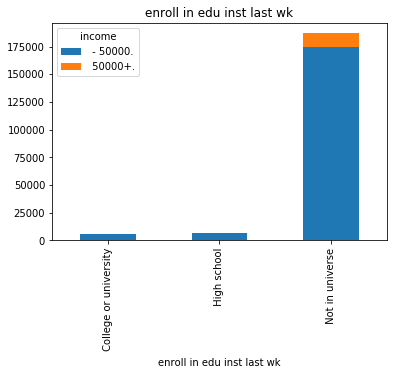

In [5]:
ind=6
dftrain.groupby('income')[col[ind]].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title=col[ind])

<div class="alert alert-success">
Since 'Not in universe' is a category that we have in many features, we assume that It means that data is not available (i.e. NAN). For this case, we can see that the most commun category is 'Not in universe' and in addition to that, the minority class (50 000+) is only available in this category, we can then drop this column since It won't give any new and interesting information/insights for training our model.
</div>

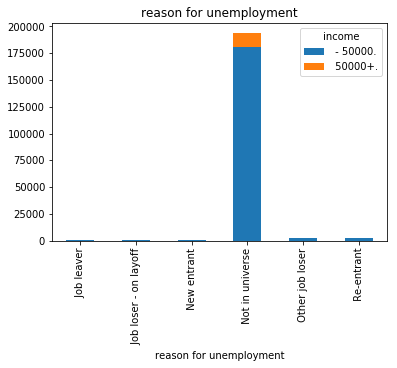

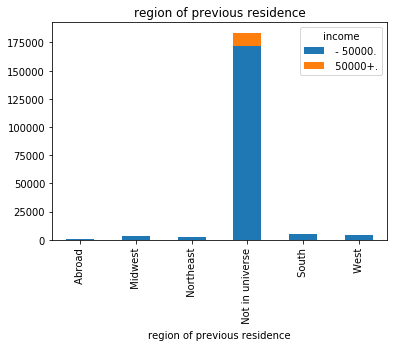

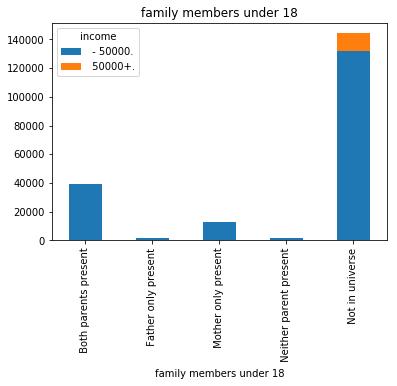

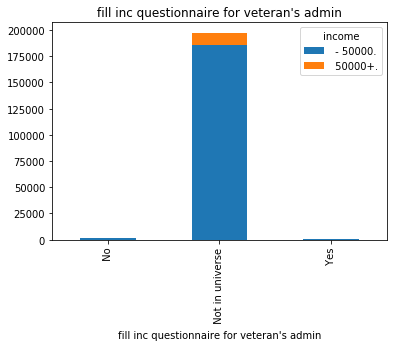

In [6]:
for ind in [14,20,31,37]:
    dftrain.groupby('income')[col[ind]].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title=col[ind])

<div class="alert alert-success">
These features should be dropped for the same reason as the previous one 
</div>

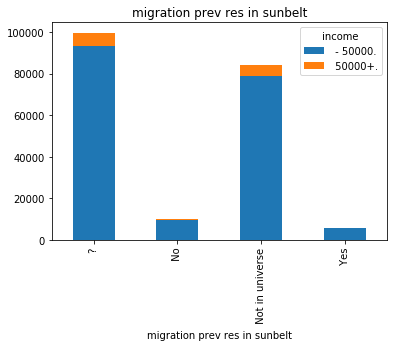

In [7]:
ind=29
dftrain.groupby('income')[col[ind]].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title=col[ind])

<div class="alert alert-success">
This feature contains mainly 'Not in universe' and '?' categories which are assumed to be non available data, we decided to drop them as well 
</div>

<div class="alert alert-success">
Meanwhile, there are features that would definitely be very beneficial for our model like 'education' which will clearly impact the income or marital stat (a married person may be more productive and then have a better income)
</div>

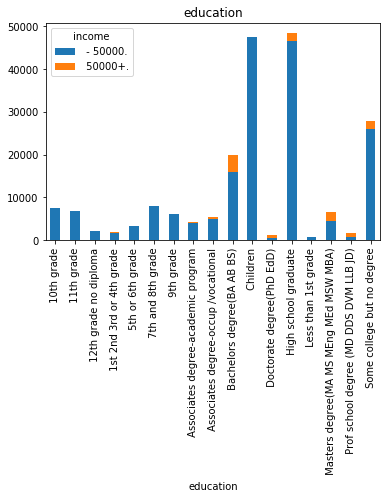

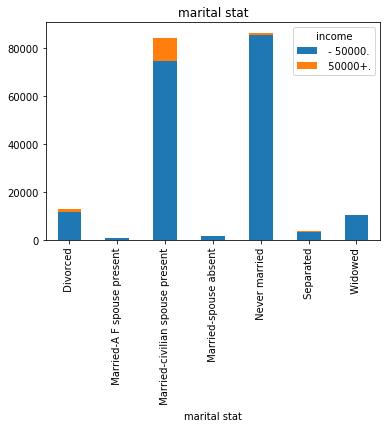

In [12]:
for ind in [4,7]:
    dftrain.groupby('income')[col[ind]].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title=col[ind])

<div class="alert alert-success">
We chose to keep some features where 'Not in universe' is the most commun with a very high percentage compared to others for the simple reason that we have data for both kind of incomes all over the other categories, which may be interesting for our model. An example is shown below:
</div>

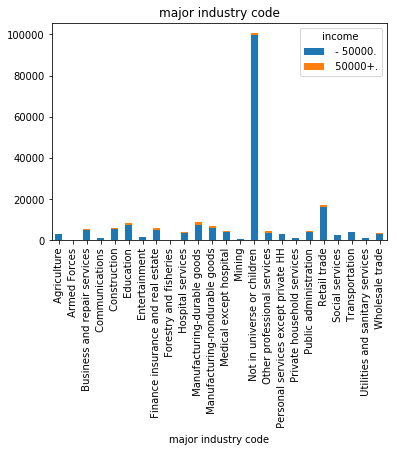

In [10]:
ind=8
dftrain.groupby('income')[col[ind]].value_counts().unstack(level=0).plot(kind='bar',stacked=True,title=col[ind])

In [28]:
dftrain_filtred=dftrain.drop(col[indexes_todrop],axis=1)
dftest_filtred=dftest.drop(col[indexes_todrop],axis=1)

In [29]:
categorical_=['class of worker','education','marital stat','major industry code','major occupation code','race','hispanic origin','sex','full or part time employment stat','tax filer stat','state of prevous residence','detailed household and family stat','detailed household summary in household','migration code-change in msa','migration code-change in reg','migration code-move within region','live in this house 1 year ago','country of birth father','country of birth mother','country of birth self','citizenship','income']

<div class="alert alert-success">
These are the categorical features in our data that we are planning to convert to numerical values using labelencoding, even if Label encoding could perform very badly when using it with tree models for example since we assume that some categories are better than others when assigning sorted discrete values to them.
</div>

In [31]:
big_X =dftrain_filtred.append(dftest_filtred)
le = LabelEncoder()
for feature in categorical_:
    big_X[feature] = le.fit_transform(big_X[feature])

<div class="alert alert-success">
MACHINE LEARNING MODELS :
</div>

In [32]:
train_X = big_X[0:dftrain_filtred.shape[0]]
test_X = big_X[dftrain_filtred.shape[0]::]

In [33]:
y = train_X['income']
X = train_X.drop('income', axis=1)
ytest= test_X['income']
Xtest=test_X.drop('income', axis=1)

<div class="alert alert-success">
We will start by using logistic regression model since it can deal quite well with label encoding and that it doesn't take much time to train 
</div>

In [34]:
clf_1 = LogisticRegression().fit(X, y)

In [35]:
predictions = clf_1.predict(Xtest)

In [36]:
print("accuracy:",accuracy_score(ytest,predictions))
print("recall:",recall_score(ytest,predictions))
print("auc score",roc_auc_score(ytest,predictions))

accuracy: 0.947885968605
recall: 0.273197542839
auc score 0.632842466384


<div class="alert alert-success">
Even if the accuracy is high the recall is so low which is normal since we have a serious class imbalance which makes the model predict the majority class the whole time 
</div>

<div class="alert alert-success">
DEALING WITH CLASS IMBALANCE : 
</div>

<div class="alert alert-success">
A gaussian naive bayesian is a probabilistic model that may help solve this problem :
</div>

In [47]:
clf = GaussianNB()
clf.fit(X, y)


GaussianNB(priors=None)

In [37]:
predictions1 = clf.predict(Xtest)

In [38]:
print("accuracy:",accuracy_score(ytest,predictions1))
print("recall:",recall_score(ytest,predictions1))
print("auc score",roc_auc_score(ytest,predictions1))

accuracy: 0.890709889537
recall: 0.546233430327
auc score 0.729857759876


In [39]:
confusion_matrix(ytest, predictions1)

array([[85480,  8096],
       [ 2807,  3379]])

<div class="alert alert-success">
We can see that the recall starts getting higher and therefore, we have a better auc score 
</div>

<div class="alert alert-success">
Now, we will do an upsampling of the minority class with replacement (We tried a downsampling using the majority class and it gave us more or less the same result on test data but we felt like we are loosing a huge amount of data and even if our model has a good accuracy & recall , we still feel that It may be less efficient for other test data)
</div>

In [37]:
df_majority=train_X[train_X['income']==0]
df_minority=train_X[train_X['income']==1]

In [38]:
len(df_majority)

187141

In [39]:
df_minority_upsampled = resample(df_minority, replace=True,n_samples=187141,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
y2 = df_upsampled['income']
X2 = df_upsampled.drop('income', axis=1)

In [40]:
clf_2 = LogisticRegression().fit(X2, y2)
predictions2 = clf_2.predict(Xtest)

In [41]:
print("accuracy:",accuracy_score(ytest,predictions2))
print("recall:",recall_score(ytest,predictions2))
print("auc score",roc_auc_score(ytest,predictions2))

accuracy: 0.827218780698
recall: 0.883931458131
auc score 0.853700575607


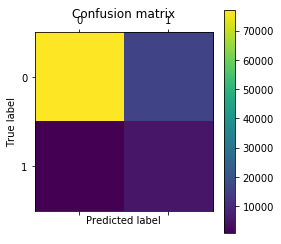

In [57]:
plt.matshow(confusion_matrix(ytest, predictions2))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

accuracy: 0.83627032337
recall: 0.744746201099
auc score 0.793533440808


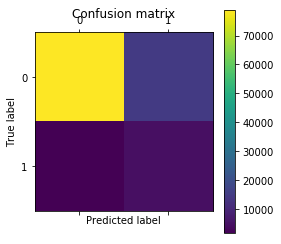

In [56]:
clf_4 = GaussianNB()
clf_4.fit(X2, y2)
pred_y_4 = clf_4.predict(Xtest)
print("accuracy:",accuracy_score(ytest,pred_y_4))
print("recall:",recall_score(ytest,pred_y_4))
print("auc score",roc_auc_score(ytest,pred_y_4))
plt.matshow(confusion_matrix(ytest, pred_y_4))
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()